Growth rate analysis

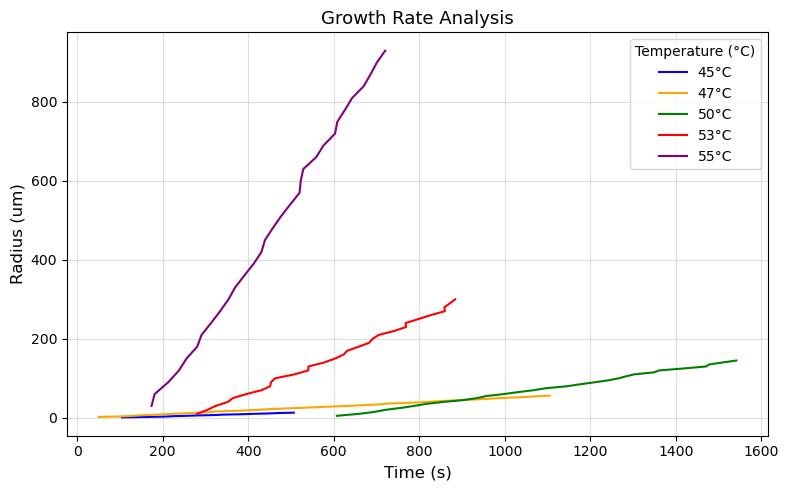

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Temperature values (used in filenames and legend) ----
temps = [45, 47, 50, 53, 55]

# ---- Build file paths automatically ----
base_path = "GR_data/GR_data_"
filepaths = [f"{base_path}{t}.csv" for t in temps]

# ---- Colour cycle (optional) ----
colors = ['blue', 'orange', 'green', 'red', 'purple']

# ---- Plot ----
plt.figure(figsize=(8, 5))

for t, path, color in zip(temps, filepaths, colors):
    df = pd.read_csv(path, header=0, sep='\t')
    plt.plot(df['time/s'], df['radius/um'], lw=1.5, label=f"{t}°C", color=color)

plt.legend(title="Temperature (°C)")
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Radius (um)', fontsize=12)
plt.title('Growth Rate Analysis', fontsize=13)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('Growth_Rate_Analysis.png', dpi=1000)
plt.show()

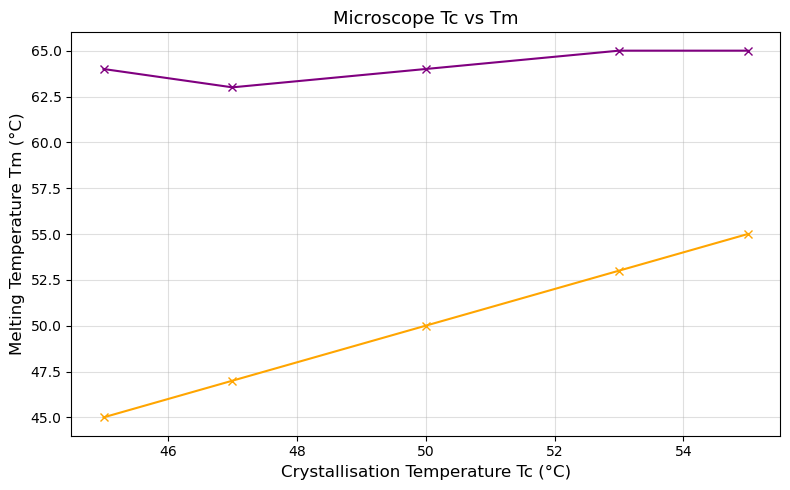

In [17]:
df2 = pd.read_csv('GR_data/TC_TM_data.csv', header=0, sep='\t')

plt.figure(figsize=(8, 5))
plt.plot(df2['Tc'], df2['Tm'], marker='x', linestyle='-', color='purple')
plt.plot(df2['Tc'], df2['Tc_Tm'], marker='x', linestyle='-', color='orange')
plt.xlabel('Crystallisation Temperature Tc (°C)', fontsize=12)
plt.ylabel('Melting Temperature Tm (°C)', fontsize=12)
plt.title('Microscope Tc vs Tm', fontsize=13)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('Microscope_Tm_vs_Tc.png', dpi=1000)
plt.show()

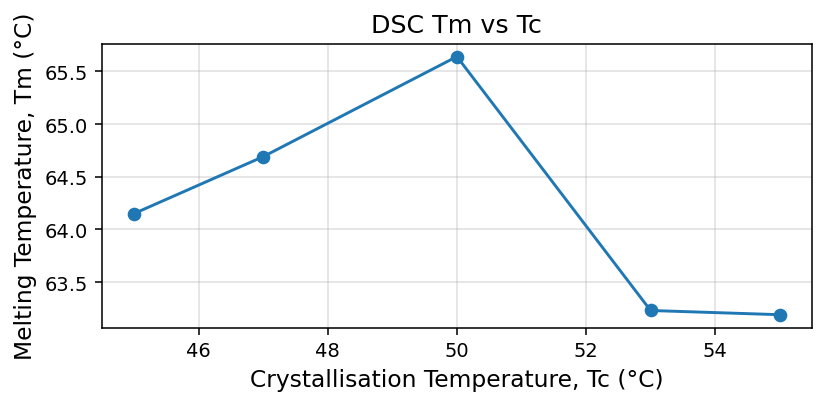

In [19]:
df = pd.read_csv("DSC_data/DSC_Tm_Tc.csv")

# --- Plot ---
plt.figure(figsize=(6, 3), dpi=140)
plt.plot(df['Tc'], df['Tm'], marker='o', color='tab:blue', lw=1.5)

# --- Formatting ---
plt.title('DSC Tm vs Tc', fontsize=13)
plt.xlabel('Crystallisation Temperature, Tc (°C)', fontsize=12)
plt.ylabel('Melting Temperature, Tm (°C)', fontsize=12)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('DSC_Tm_vs_Tc.png', dpi=1000)
plt.show()